# FOREST HEALTH UK #

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing the data

In [3]:
df = pd.read_csv('/Users/sandra/Desktop/Capstone/Final_clean_eda_data.csv')
df.head()

year plot_type assessment_date assessment_type  plot_number subplot  \
0  1995        OK      1995-07-31               I            1       N   
1  1995        OK      1995-07-31               I            1       N   
2  1995        OK      1995-07-31               I            1       N   
3  1995        OK      1995-07-31               I            1       N   
4  1995        OK      1995-07-31               I            1       N   

   tree_number species  local_crown_density  diameter_mm  height_cm  \
0            1     Oak                 15.0        875.0        0.0   
1            2     Oak                 25.0        517.0        0.0   
2            3     Oak                 15.0        673.0        0.0   
3            4     Oak                 10.0        621.0        0.0   
4            5     Oak                 25.0       1020.0        0.0   

                                tree_dominance_class  \
0  co-dominant,trees with crowns forming the gene...   
1  intermediate\ttrees extending into the canopy ...   
2  dominant,trees with upper crown standing above...   
3  co-dominant,trees with crowns forming the gene...   
4  dominant,trees with upper crown standing above...   

                        canopy_closure_class  \
0   crown in contact with others on one side   
1   crown in contact with others on one side   
2  crown in contact with others on two sides   
3   crown in contact with others on one side   
4   crown in contact with others on one side   

                    defoliation_type     broadleaf_dieback_type  \
0             peripheral defoliation  middle parts of the crown   
1  gaps in the lateral branch system       throughout the crown   
2             peripheral defoliation       throughout the crown   
3             peripheral defoliation       throughout the crown   
4  gaps in the lateral branch system  middle parts of the crown   

   broadleaf_dieback_location  broadleaf_dieback_extend_per  \
0                         5.0                           5.0   
1                         3.0                           5.0   
2                         5.0                           5.0   
3                         3.0                           5.0   
4                         5.0                           5.0   

       leaf_browning leaf_yellowing                       shoot_death_crown  \
0               none           none  n/a for beach,oak trees and scots pine   
1               none           none  n/a for beach,oak trees and scots pine   
2  leaf margins only           none  n/a for beach,oak trees and scots pine   
3               none           none  n/a for beach,oak trees and scots pine   
4               none           none  n/a for beach,oak trees and scots pine   

            shoot_death_branch shoot_death_extent  \
0  n/a for beach and oak trees                5.0   
1  n/a for beach and oak trees                5.0   
2  n/a for beach and oak trees                5.0   
3  n/a for beach and oak trees                5.0   
4  n/a for beach and oak trees                5.0   

                secondary_shoot_locations  \
0  n/a for beach,oak trees and scots pine   
1  n/a for beach,oak trees and scots pine   
2  n/a for beach,oak trees and scots pine   
3  n/a for beach,oak trees and scots pine   
4  n/a for beach,oak trees and scots pine   

                         needle_retention  current_browning_needles  \
0  n/a for beach,oak trees and scots pine                       5.0   
1  n/a for beach,oak trees and scots pine                       5.0   
2  n/a for beach,oak trees and scots pine                       5.0   
3  n/a for beach,oak trees and scots pine                       5.0   
4  n/a for beach,oak trees and scots pine                       5.0   

  current_yellowing_needles    overall_discolouration  \
0  entire needles chlorotic   0-10% of needles/leaves   
1  entire needles chlorotic   0-10% of needles/leaves   
2  entire needles chlorotic  11-25% of needles/leaves   
3  

In [4]:
df.isnull().sum()

year                            0
plot_type                       0
assessment_date                 0
assessment_type                 0
plot_number                     0
subplot                         0
tree_number                     0
species                         0
local_crown_density             0
diameter_mm                     0
height_cm                       0
tree_dominance_class            0
canopy_closure_class            0
defoliation_type                0
broadleaf_dieback_type          0
broadleaf_dieback_location      0
broadleaf_dieback_extend_per    0
leaf_browning                   0
leaf_yellowing                  0
shoot_death_crown               0
shoot_death_branch              0
shoot_death_extent              0
secondary_shoot_locations       0
needle_retention                0
current_browning_needles        0
current_yellowing_needles       0
overall_discolouration          0
mechanical_damage_type_1        0
mechanical_damage_1             0
mechanical_dam

# Mapping out tree species and plot types 

In [5]:
from pyproj import Proj, transform
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from geopandas import GeoDataFrame

In [6]:
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")


def convertLL(df):

    easting = df['eastings']
    northing = df['northings']
    

    vlon36, vlat36 = vgrid(easting, northing, inverse=True)

    converted = transform(v36, v84, vlon36, vlat36)

    df['longitude'] = converted[0]
    df['latitude'] = converted[1]

    return df


values2 = pd.read_csv('/Users/sandra/Desktop/Capstone/Final_clean_data.csv')
values2 = values2.apply(convertLL, axis=1)

/Users/sandra/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/sandra/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
<ipython-input-6-16365e98809b>:15: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = t

In [7]:
gdf2 = gpd.GeoDataFrame(
    values2, geometry=gpd.points_from_xy(values2.longitude, values2.latitude))

# Visualisation 

### General EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-9-9394aef2e35e>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrs, dtype=np.bool)


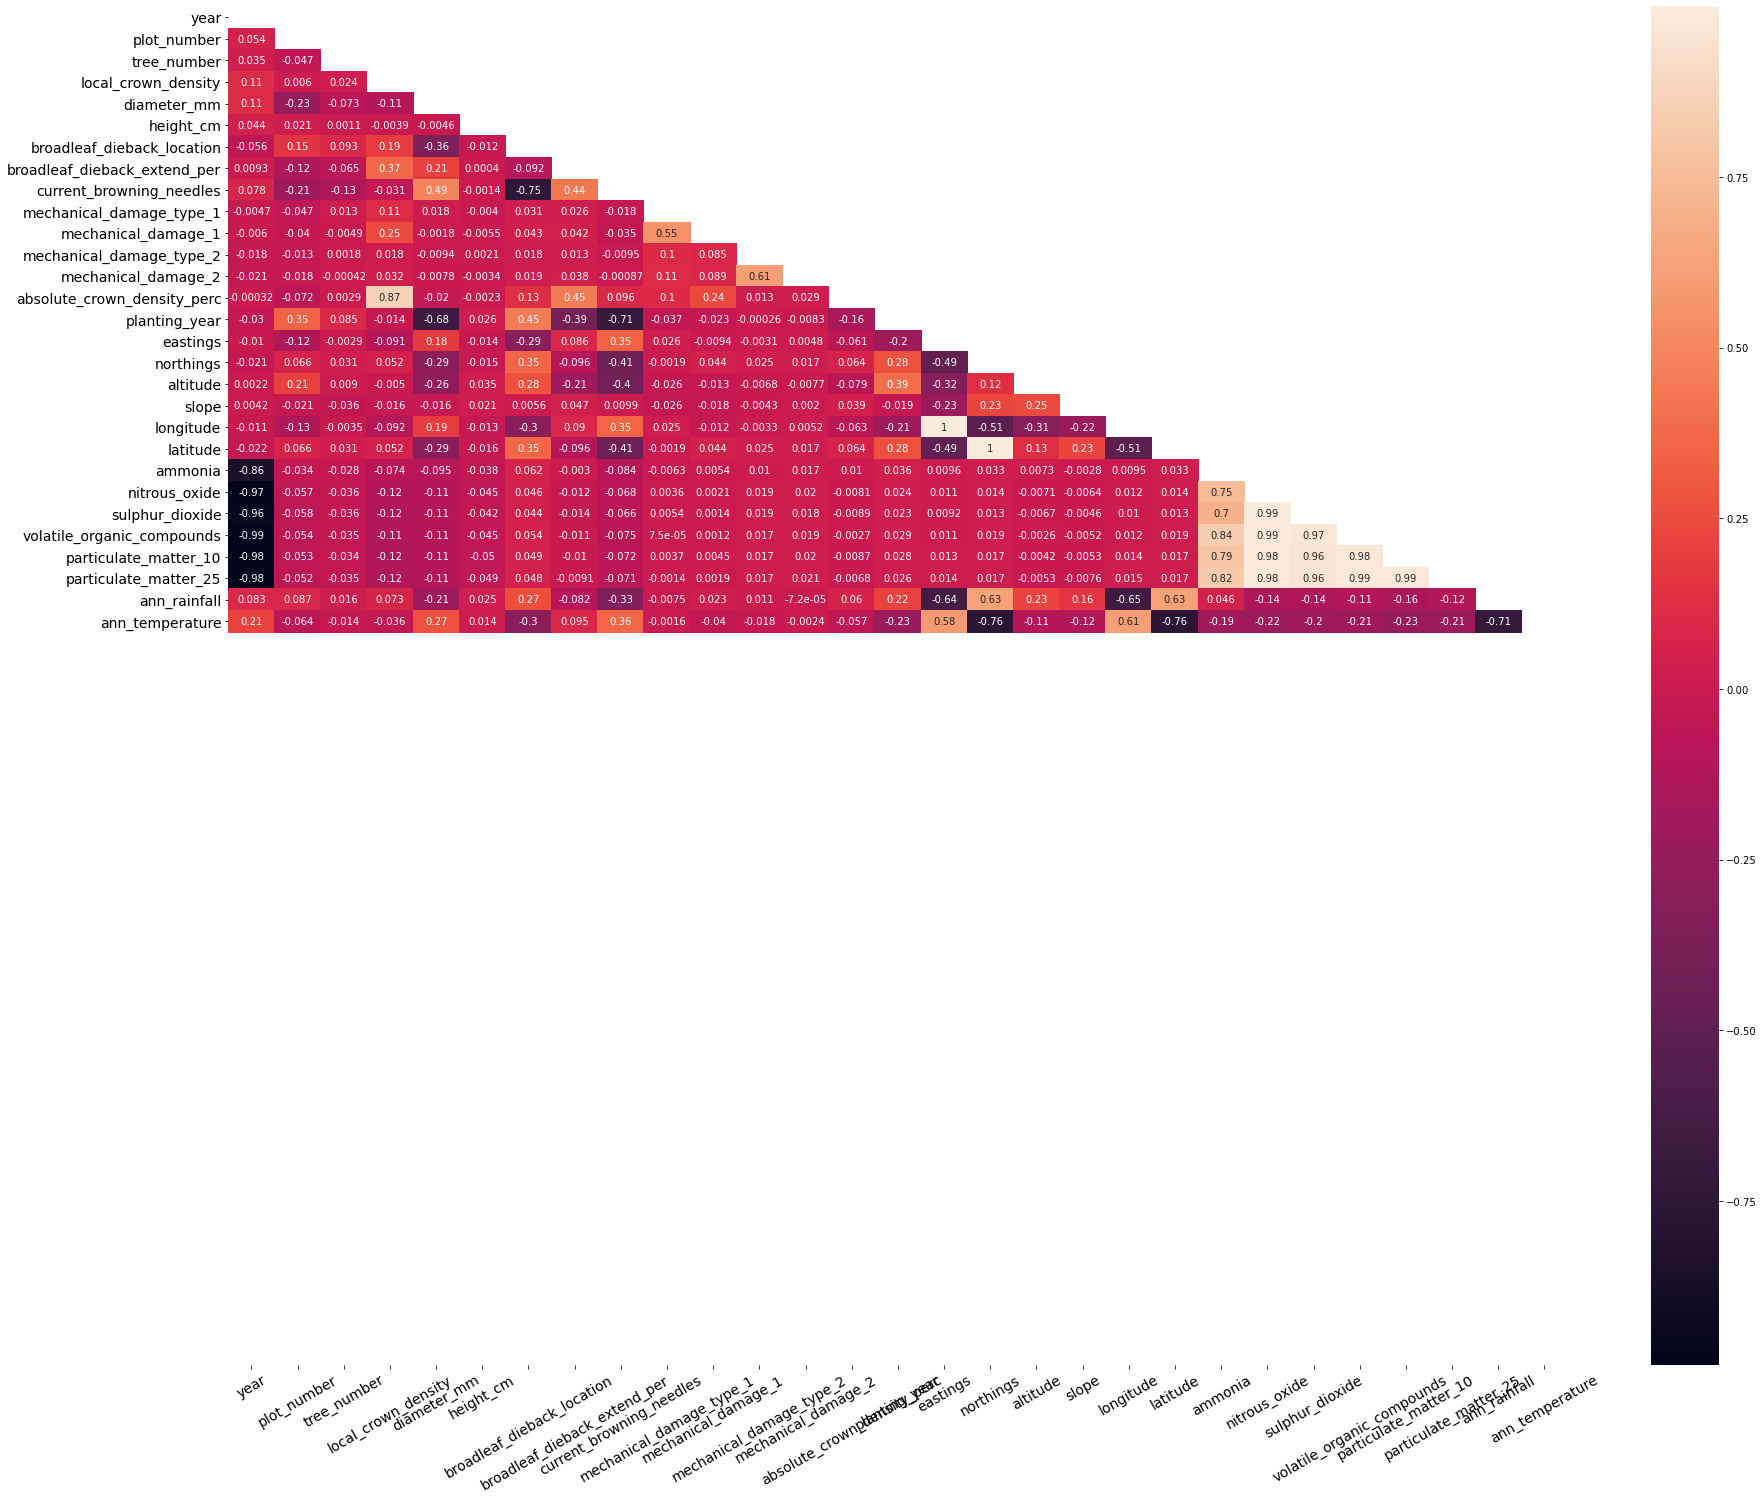

In [9]:
def correlation_heat_map(df):
    corrs = df.corr()


# Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(30, 25))

# Generate a mask for the upper triangle (taken from seaborn example gallery) to remove half of the repetitive items
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

# Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    ax.set_ylim([df.shape[1], 0])
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    return fig, ax



fig, ax = correlation_heat_map(df)

<ipython-input-10-d4ef7639c2e9>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrs, dtype=np.bool)


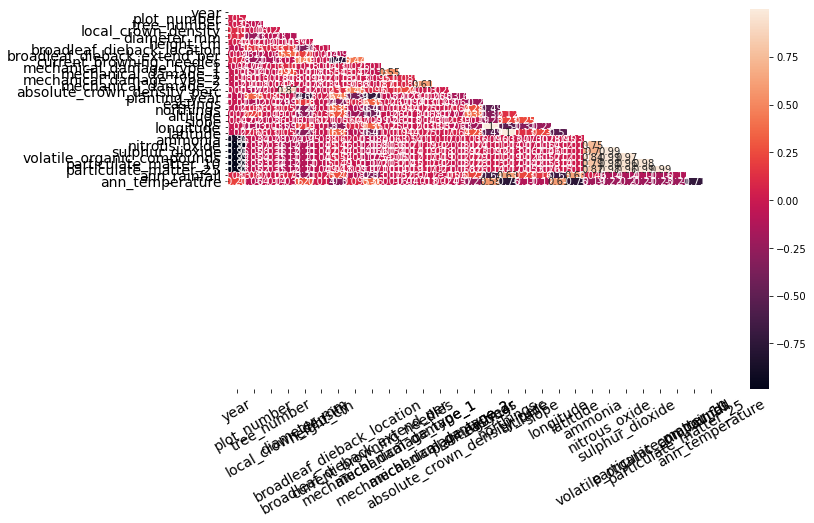

In [10]:
def correlation_heat_map(df):
    corrs = df.corr()


# Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11, 7))

# Generate a mask for the upper triangle (taken from seaborn example gallery) to remove half of the repetitive items
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

# Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    ax.set_ylim([df.shape[1], 0])
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    return fig, ax


fig, ax = correlation_heat_map(df)

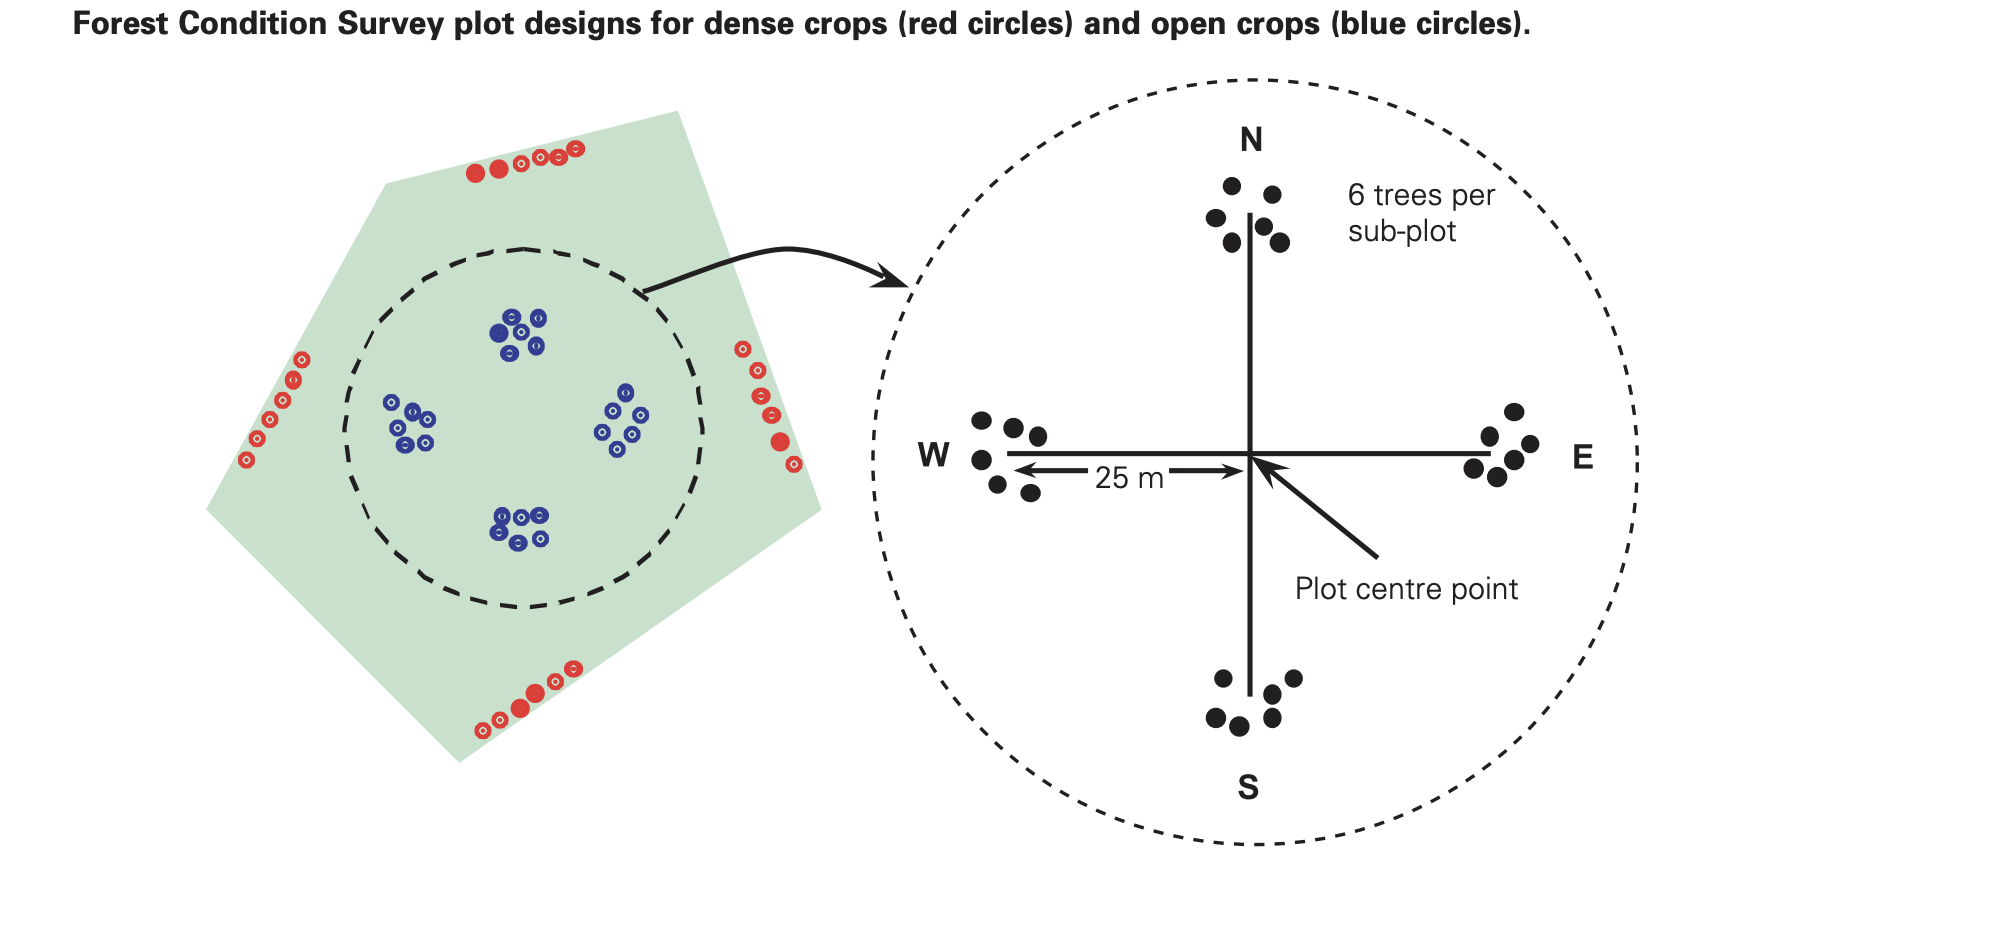

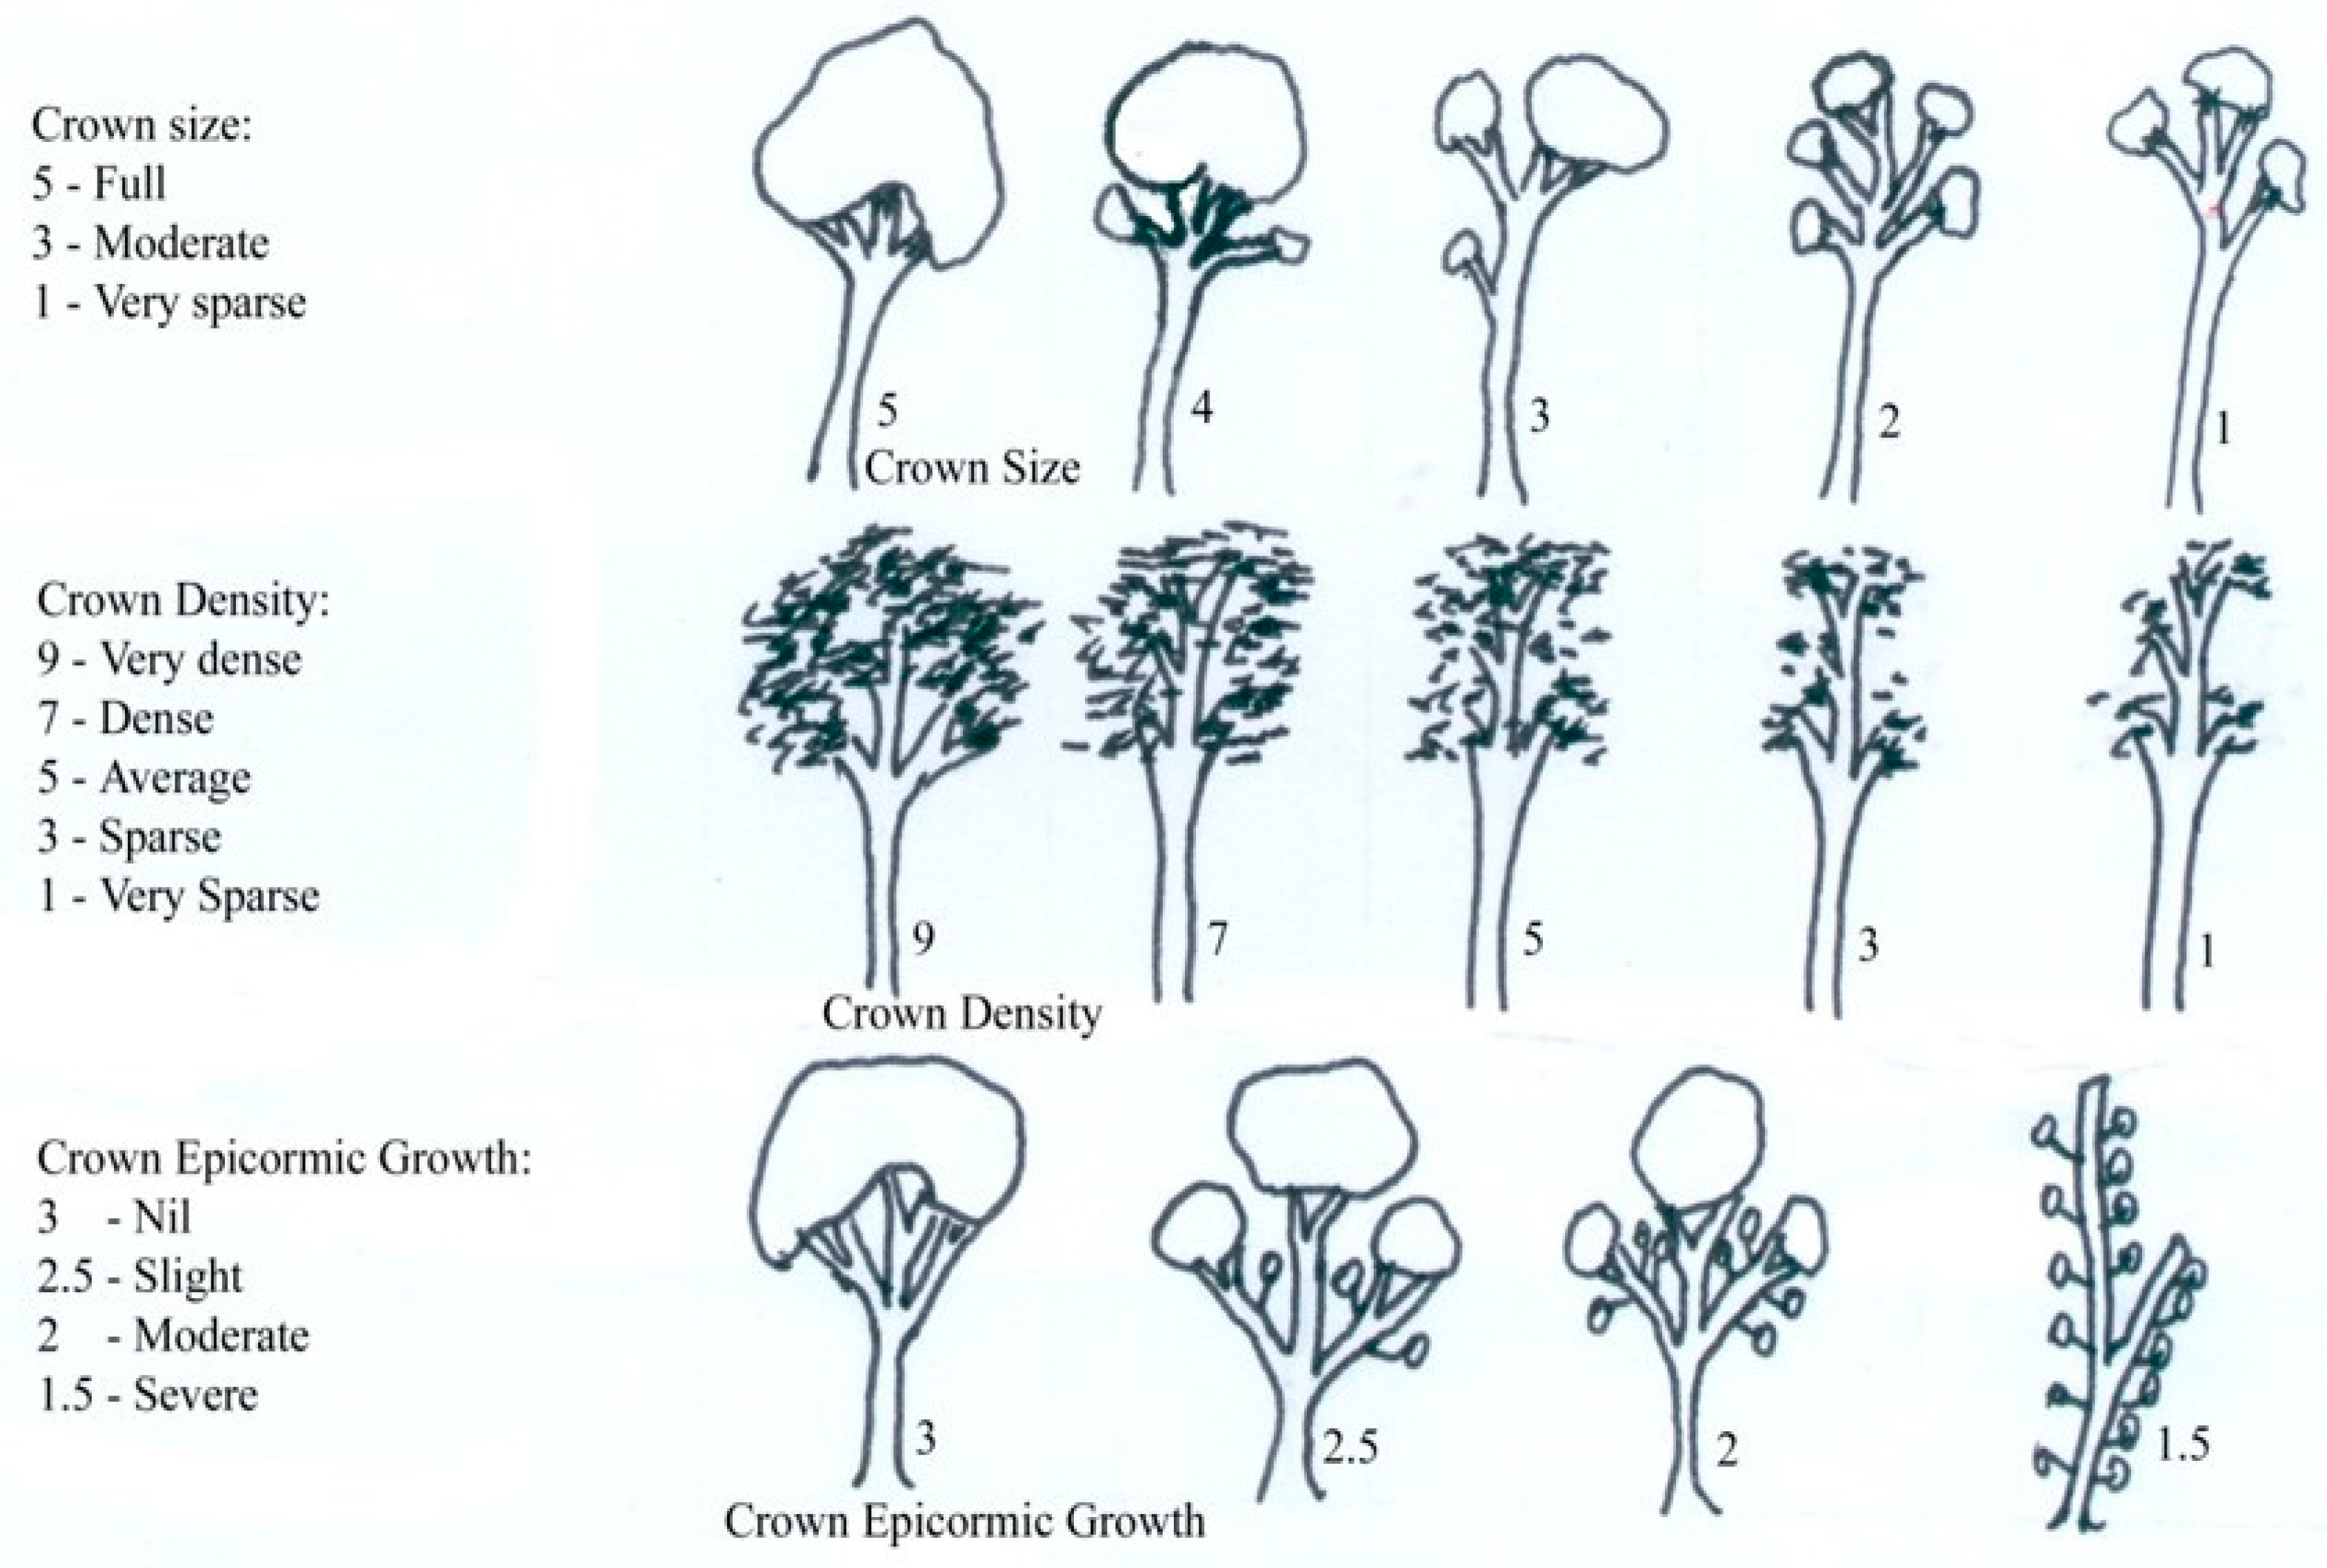

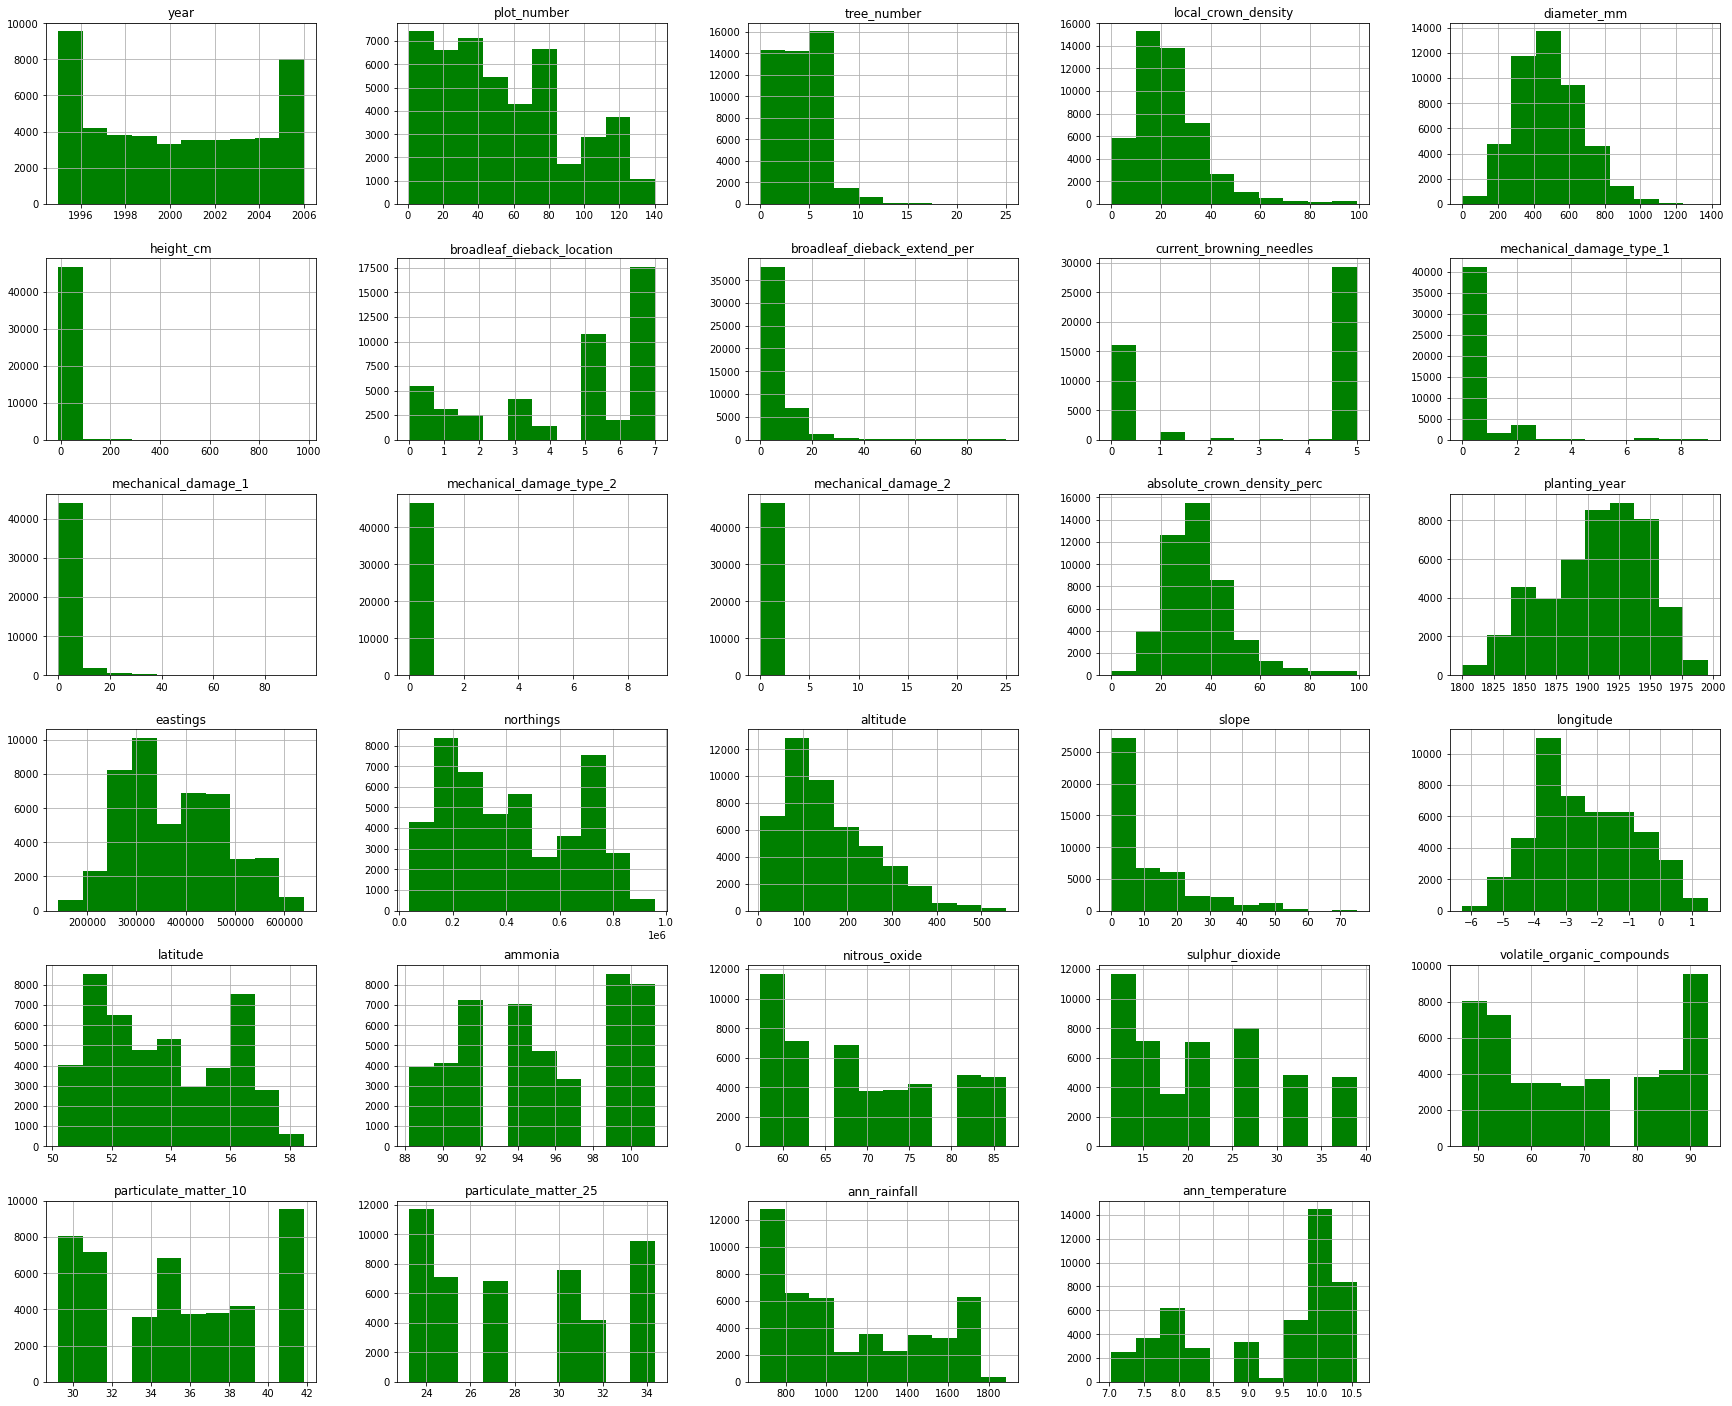

In [11]:
df.hist(bins=10, figsize =(30,25), color = "green")
plt.show()


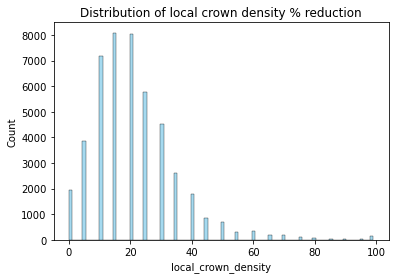

In [12]:
#Local crown density distribution
sns.histplot(df['local_crown_density'], color='skyblue')
plt.title("Distribution of local crown density % reduction");

In [13]:
df.species.unique()

array(['Oak', 'Sitka Spruce', 'Scots Pine', 'Norway Spruce', 'Beech'],
      dtype=object)

In [14]:
# County boundaries in UK (Polygon) - UK map template
counties = gpd.read_file('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Igismap/UnitedKingdom_Bound.shp')

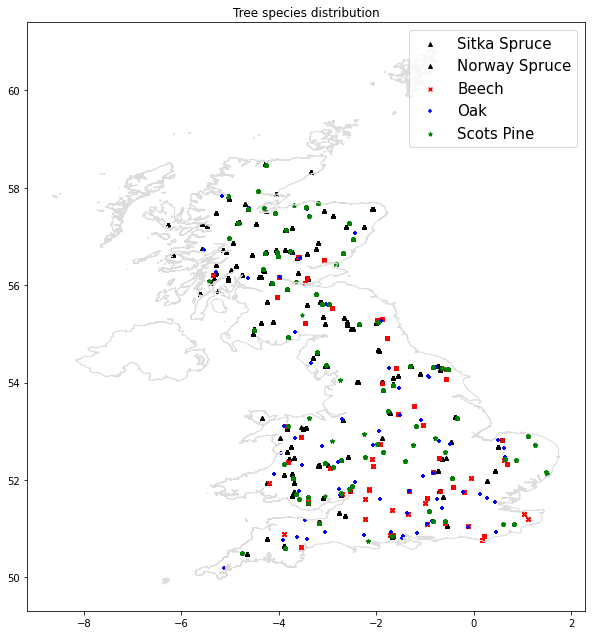

In [15]:
ax = counties.plot(figsize=(10,15), color='none', edgecolor='gainsboro', zorder=3)
gdf2[gdf2['species']== 'Sitka Spruce'].plot(color='black', markersize=15,marker = "^",label = 'Sitka Spruce', ax=ax)
gdf2[gdf2['species']== 'Norway Spruce'].plot(color='black', markersize=15,marker = "^", label = 'Norway Spruce', ax=ax)
gdf2[gdf2['species']== 'Beech'].plot(color='red', markersize=15,marker = "x", label = 'Beech', ax=ax)
gdf2[gdf2['species']== 'Oak'].plot(color='blue', markersize=15,marker = "+", label= 'Oak',ax=ax)
gdf2[gdf2['species']== 'Scots Pine'].plot(color='green', markersize=15,marker = "*", label= 'Scots Pine', ax=ax)

ax.set_title('Tree species distribution')
plt.legend(prop = {'size':15});


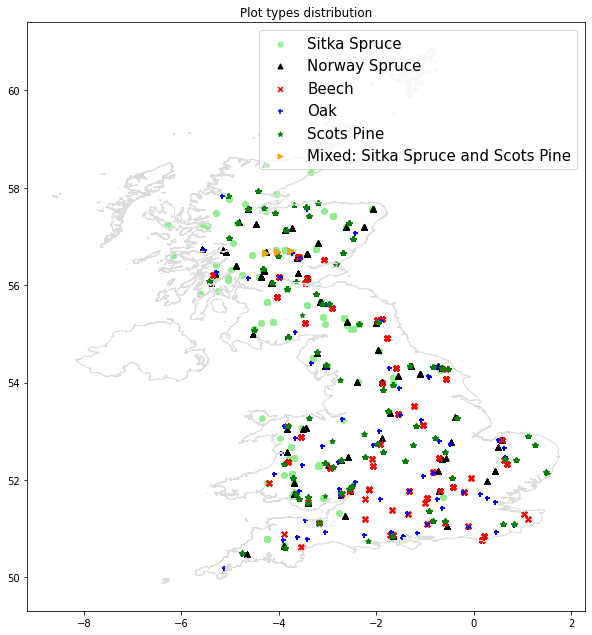

In [16]:
ax = counties.plot(figsize=(10,15), color='none', edgecolor='gainsboro', zorder=3)
gdf2[gdf2['plot_type']== 'SS'].plot(color='lightgreen', markersize=25,marker = "o", label='Sitka Spruce', ax=ax)
gdf2[gdf2['plot_type']== 'NS'].plot(color='black', markersize=25,marker = "^", label='Norway Spruce', ax=ax)
gdf2[gdf2['plot_type']== 'BE'].plot(color='red', markersize=25,marker = "x", label='Beech', ax=ax)
gdf2[gdf2['plot_type']== 'OK'].plot(color='blue', markersize=25,marker = "+", label='Oak', ax=ax)
gdf2[gdf2['plot_type']== 'SP'].plot(color='green', markersize=25,marker = "*", label='Scots Pine', ax=ax)
gdf2[gdf2['plot_type']== 'MX'].plot(color='orange', markersize=25,marker = ">", label='Mixed: Sitka Spruce and Scots Pine', ax=ax)

ax.set_title('Plot types distribution')
plt.legend(prop = {'size':15});

### Creating new features

In [17]:
#creating age
df['age'] = df['year'] - df['planting_year'] 

In [18]:
#creating mean of local crown density reduction based on tree species
mean_col = df.groupby(['year', 'species'])['local_crown_density'].mean() # don't reset the index!
df = df.set_index(['year', 'species']) # make the same index here
df['mean_col'] = mean_col
df = df.reset_index() # to take the hierarchical index off again

### Looking at the outliers

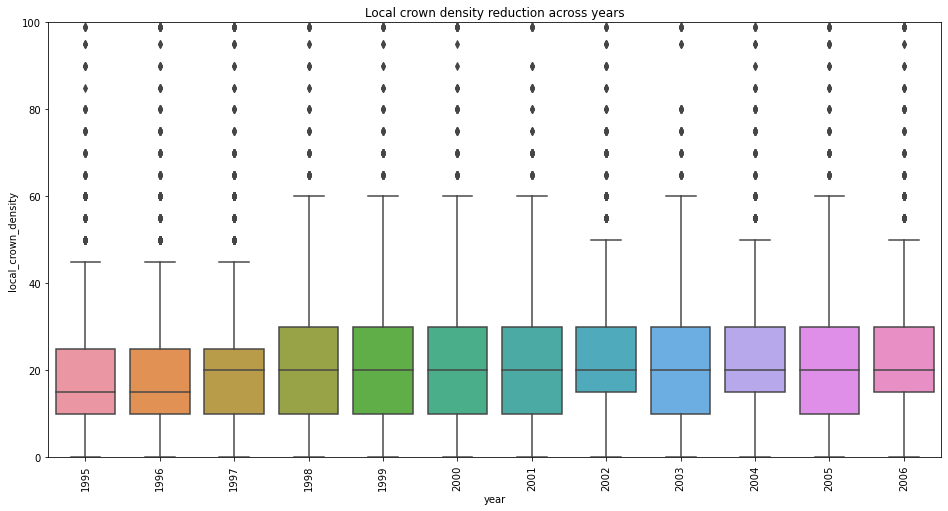

In [19]:
var = 'year'
data = pd.concat([df['local_crown_density'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="local_crown_density", data=data)
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);
plt.title("Local crown density reduction across years");
plt.savefig("lcdoutliers.png", bbox_inches='tight')

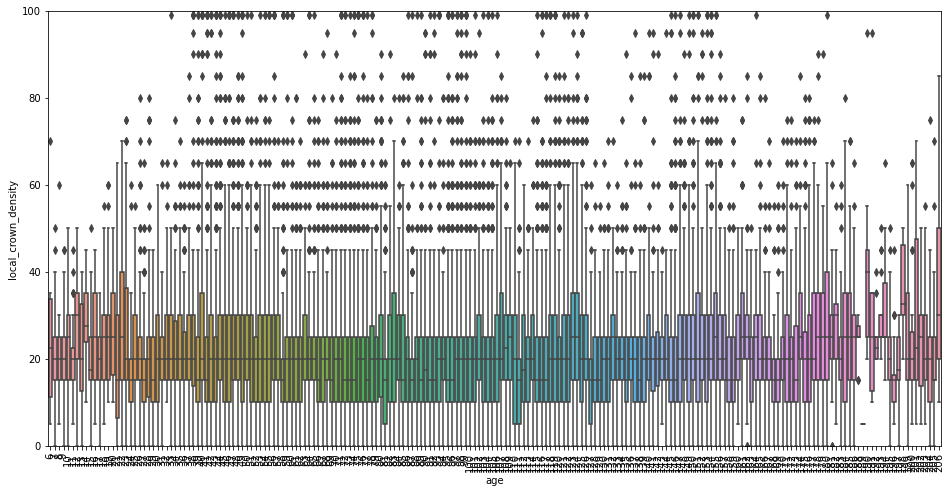

In [20]:
var = 'age'
data = pd.concat([df['local_crown_density'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="local_crown_density", data=data)
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

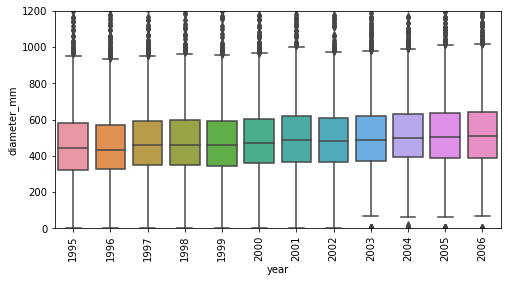

In [21]:
var = 'year'
data = pd.concat([df['diameter_mm'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=var, y="diameter_mm", data=data)
fig.axis(ymin=0, ymax=1200);
plt.xticks(rotation=90);

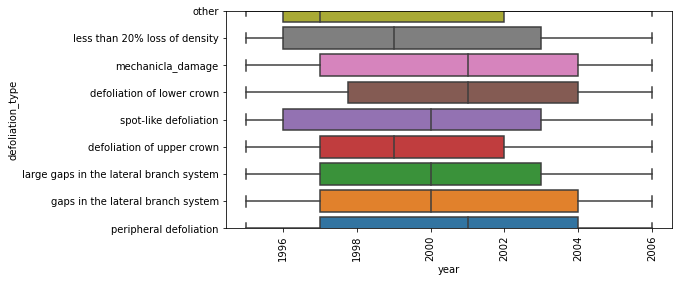

In [22]:
var = 'year'
data = pd.concat([df['defoliation_type'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=var, y="defoliation_type", data=data)
fig.axis(ymin=0.0, ymax=8.0);
plt.xticks(rotation=90);

### Feature distribution

In [23]:
#A function that plots a horizontal graph for the given column name

def horizontal_graph(data, column_name, color, plot_title):
    
    
    fig, ax = plt.subplots(figsize = (9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    #ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()

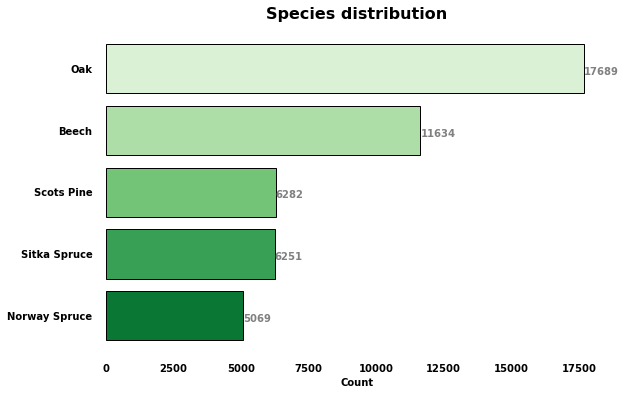

In [24]:
horizontal_graph(df, 'species', 'Greens', 'Species distribution')

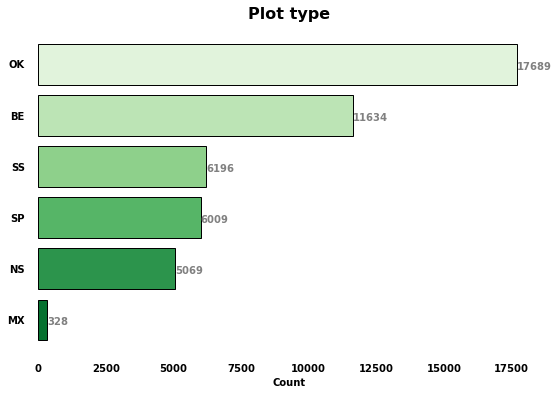

In [25]:
horizontal_graph(df, 'plot_type', 'Greens', 'Plot type')

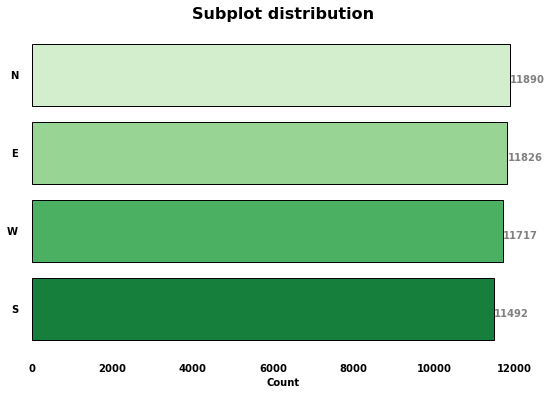

In [26]:
horizontal_graph(df, 'subplot', 'Greens', 'Subplot distribution')

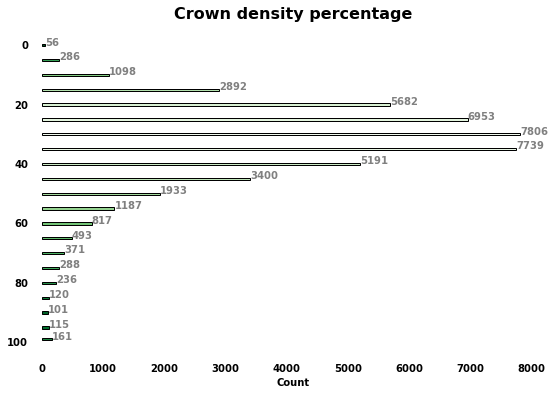

In [27]:
horizontal_graph(df, 'absolute_crown_density_perc', 'Greens', 'Crown density percentage')

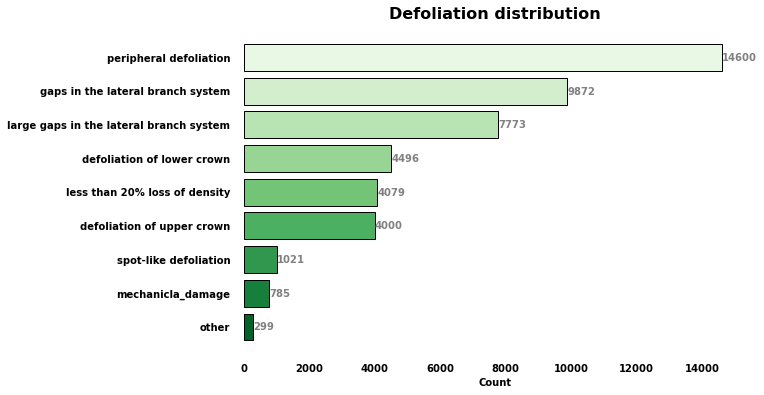

In [28]:
horizontal_graph(df, 'defoliation_type', 'Greens', 'Defoliation distribution')

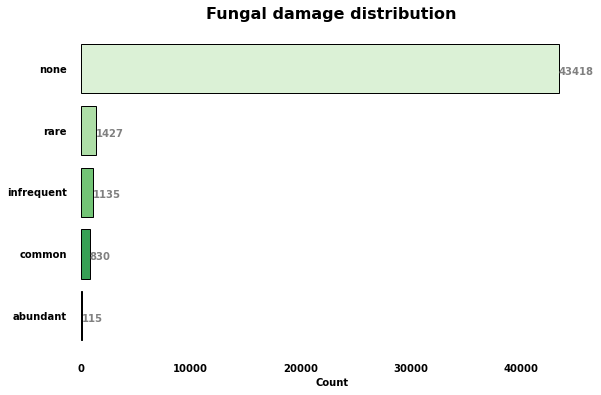

In [29]:
horizontal_graph(df, 'damage_fungal', 'Greens', 'Fungal damage distribution')

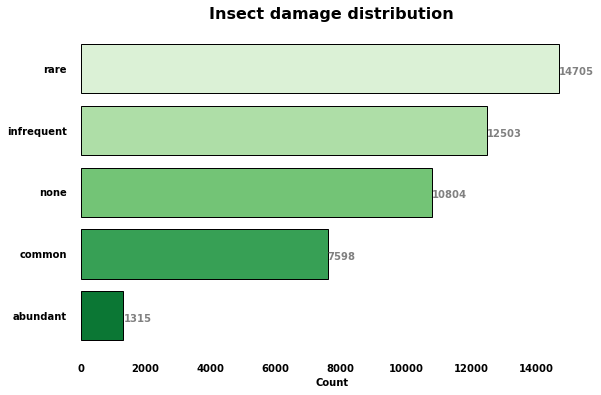

In [30]:
horizontal_graph(df, 'damage_insect', 'Greens', 'Insect damage distribution')

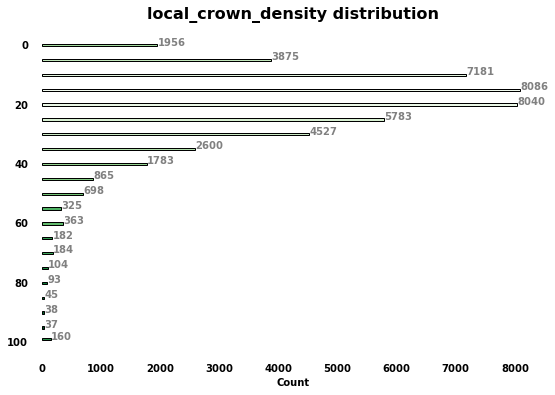

In [31]:
horizontal_graph(df, 'local_crown_density', 'Greens', 'local_crown_density distribution')

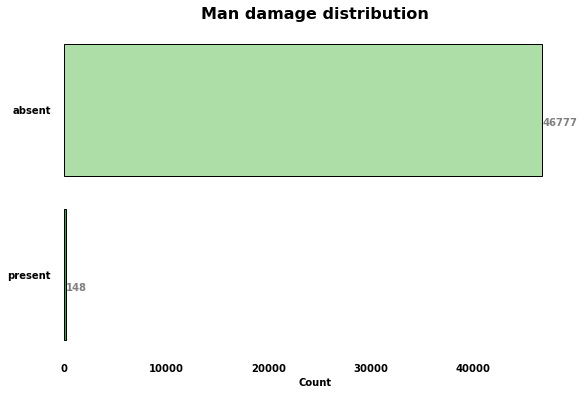

In [32]:
horizontal_graph(df, 'damage_man', 'Greens', 'Man damage distribution')

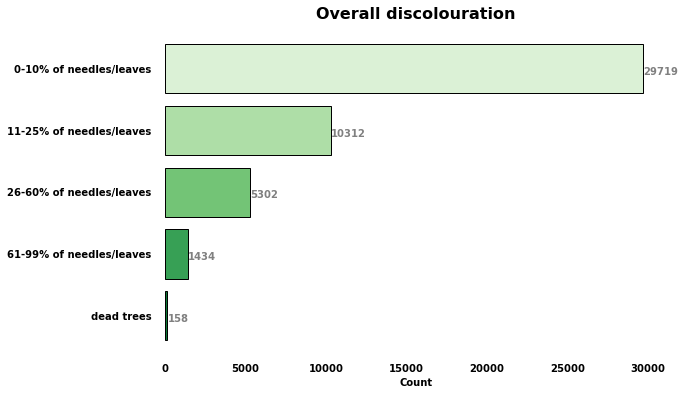

In [33]:
horizontal_graph(df, 'overall_discolouration', 'Greens', 'Overall discolouration')

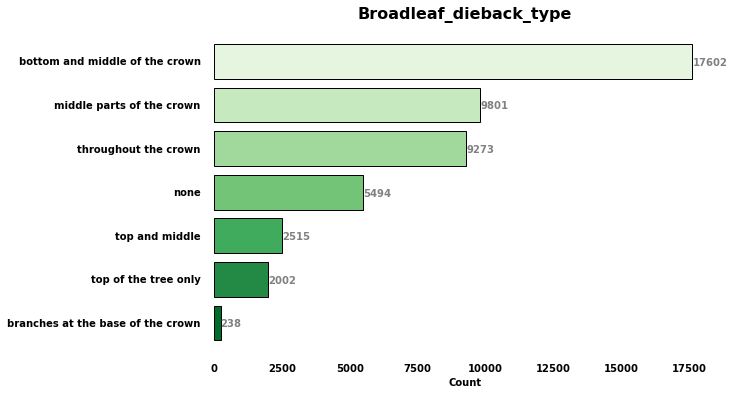

In [34]:
horizontal_graph(df, 'broadleaf_dieback_type', 'Greens', 'Broadleaf_dieback_type')

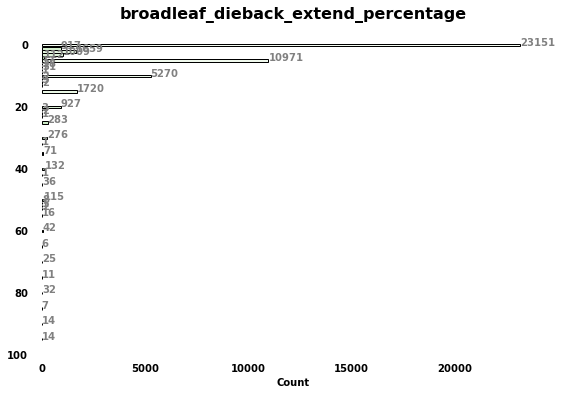

In [35]:
horizontal_graph(df, 'broadleaf_dieback_extend_per', 'Greens', 'broadleaf_dieback_extend_percentage')

In [36]:
df_copy = df.copy()

### Group by analysis

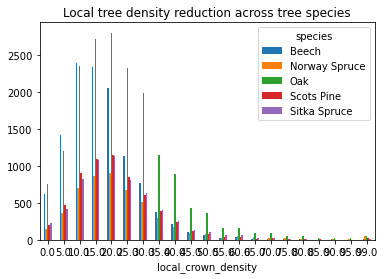

In [37]:
sub1 = df.groupby(by=['local_crown_density','species']).size()
sub1.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Local tree density reduction across tree species");
plt.savefig("lcdospecies.png", bbox_inches='tight')

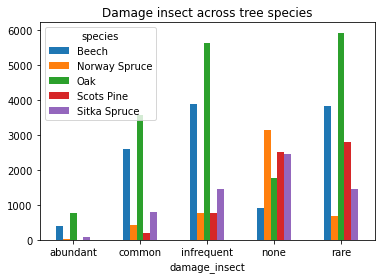

In [38]:
sub1 = df.groupby(by=['damage_insect','species']).size()
sub1.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Damage insect across tree species");

In [39]:
sub1 = df.groupby(by=['damage_insect','species']).size()
sub1

damage_insect  species      
abundant       Beech             392
               Norway Spruce      37
               Oak               780
               Scots Pine         10
               Sitka Spruce       96
common         Beech            2596
               Norway Spruce     415
               Oak              3587
               Scots Pine        208
               Sitka Spruce      792
infrequent     Beech            3887
               Norway Spruce     779
               Oak              5628
               Scots Pine        762
               Sitka Spruce     1447
none           Beech             916
               Norway Spruce    3160
               Oak              1765
               Scots Pine       2508
               Sitka Spruce     2455
rare           Beech            3843
               Norway Spruce     678
               Oak              5929
               Scots Pine       2794
               Sitka Spruce     1461
dtype: int64

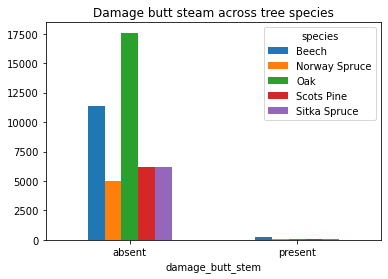

In [40]:
df.groupby(by=['damage_butt_stem','species']).size().unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Damage butt steam across tree species");

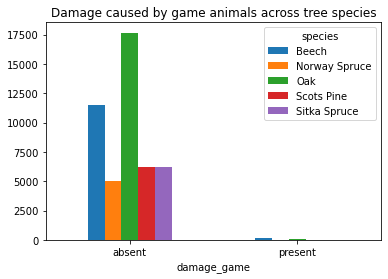

In [41]:
sub2 = df.groupby(by=['damage_game', 'species']).size().unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Damage caused by game animals across tree species");

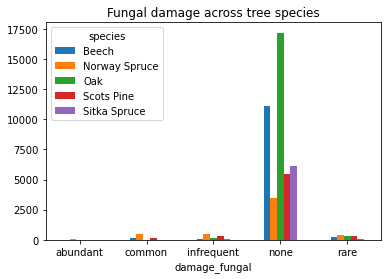

In [42]:
df.groupby(by=['damage_fungal', 'species']).size().unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Fungal damage across tree species");


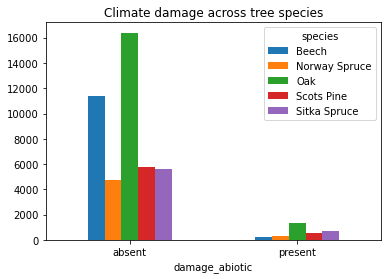

In [43]:
sub2 = df.groupby(by=['damage_abiotic','species']).size()
sub2.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Climate damage across tree species");

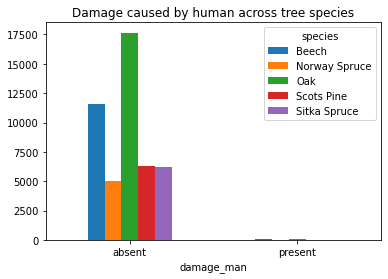

In [44]:
sub2 = df.groupby(by=['damage_man', 'species'])['species'].size()
sub2.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Damage caused by human across tree species");

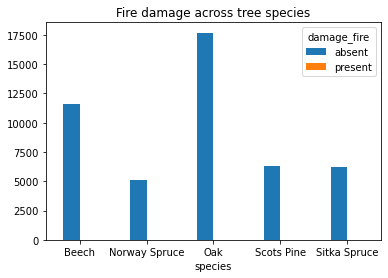

In [45]:
sub2 = df.groupby(by=['species','damage_fire'])['species'].size()
sub2.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Fire damage across tree species");

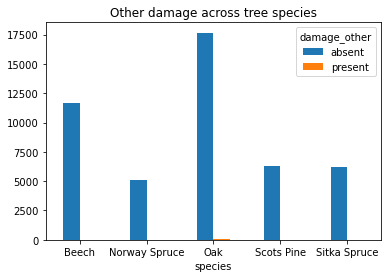

In [46]:
sub2 = df.groupby(by=['species','damage_other'])['species'].size()
sub2.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Other damage across tree species");

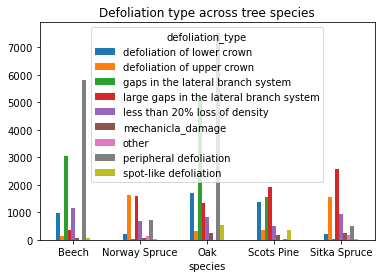

In [47]:
sub2 = df.groupby(by=['species','defoliation_type'])['species'].size()
sub2.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Defoliation type across tree species");

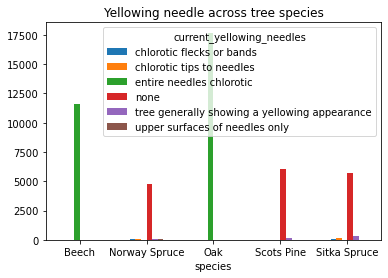

In [48]:
sub2 = df.groupby(by=['species','current_yellowing_needles'])['species'].size()
sub2.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Yellowing needle across tree species");

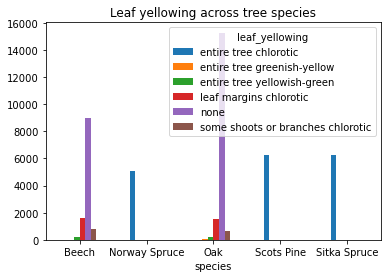

In [49]:
sub2 = df.groupby(by=['species','leaf_yellowing'])['species'].size()
sub2.unstack(level=-1).plot(kind = 'bar', rot = 0)
plt.title("Leaf yellowing across tree species");

In [50]:
pd.set_option('display.max_columns', None) 

In [51]:
df.corr()

year  plot_number  tree_number  \
year                          1.000000     0.053722     0.035052   
plot_number                   0.053722     1.000000    -0.047099   
tree_number                   0.035052    -0.047099     1.000000   
local_crown_density           0.110220     0.005975     0.024127   
diameter_mm                   0.110811    -0.234149    -0.073304   
height_cm                     0.044269     0.021201     0.001052   
broadleaf_dieback_location   -0.055848     0.145129     0.093301   
broadleaf_dieback_extend_per  0.009275    -0.122820    -0.065285   
current_browning_needles      0.077527    -0.209833    -0.126590   
mechanical_damage_type_1     -0.004679    -0.046924     0.012928   
mechanical_damage_1          -0.006042    -0.039524    -0.004866   
mechanical_damage_type_2     -0.018199    -0.012756     0.001836   
mechanical_damage_2          -0.021454    -0.017858    -0.000417   
absolute_crown_density_perc  -0.000319    -0.071933     0.002939   
planting_year                -0.029844     0.345294     0.084714   
eastings                     -0.010334    -0.122458    -0.002919   
northings                    -0.021377     0.066455     0.030922   
altitude                      0.002217     0.206393     0.009028   
slope                         0.004218    -0.020903    -0.036100   
longitude                    -0.011038    -0.125915    -0.003474   
latitude                     -0.021551     0.066316     0.030958   
ammonia                      -0.859299    -0.033999    -0.028284   
nitrous_oxide                -0.974209    -0.056871    -0.035875   
sulphur_dioxide              -0.958535    -0.057683    -0.035869   
volatile_organic_compounds   -0.991140    -0.053898    -0.035285   
particulate_matter_10        -0.976184    -0.053073    -0.033781   
particulate_matter_25        -0.978951    -0.052058    -0.035045   
ann_rainfall                  0.083132     0.086759     0.016398   
ann_temperature               0.214669    -0.063540    -0.014068   
age                           0.115843    -0.338492    -0.081161   
mean_col                      0.465982     0.104417     0.032314   

                              local_crown_density  diameter_mm  height_cm  \
year                                     0.110220     0.110811   0.044269   
plot_number                              0.005975    -0.234149   0.021201   
tree_number                              0.024127    -0.073304   0.001052   
local_crown_density                      1.000000    -0.105389  -0.003884   
diameter_mm                             -0.105389     1.000000  -0.004604   
height_cm                               -0.003884    -0.004604   1.000000   
broadleaf_dieback_location               0.188029    -0.360724  -0.011607   
broadleaf_dieback_extend_per             0.366545     0.206296   0.000396   
current_browning_needles                -0.031349     0.493003  -0.001420   
mechanical_damage_type_1                 0.106504     0.018093  -0.004013   
mechanical_damage_1                      0.252217    -0.001754  -0.005487   
mechanical_damage_type_2                 0.017814    -0.009402   0.002150   
mechanical_damage_2                      0.032230    -0.007771  -0.003382   
absolute_crown_density_perc              0.865539    -0.019946  -0.002268   
planting_year                           -0.014018    -0.675118   0.026259   
eastings                                -0.090889     0.175892  -0.013836   
northings                                0.051886    -0.293913  -0.015419   
altitude                                -0.005015    -0.264550   0.034907   
slope                                   -0.016292    -0.016341   0.020724   
longitude                               -0.092465     0.185678  -0.013071   
latitude                                 0.051534    -0.293335  -0.015532   
ammonia                                 -0.073764    -0.094857  -0.037995   
nitrous_oxide                           -0.119046    -0.108534  -0.044774   
sulphur_d

In [52]:
df.corr()['local_crown_density'].sort_values(ascending = False)

local_crown_density             1.000000
absolute_crown_density_perc     0.865539
broadleaf_dieback_extend_per    0.366545
mechanical_damage_1             0.252217
mean_col                        0.236532
broadleaf_dieback_location      0.188029
year                            0.110220
mechanical_damage_type_1        0.106504
ann_rainfall                    0.073259
northings                       0.051886
latitude                        0.051534
mechanical_damage_2             0.032230
tree_number                     0.024127
age                             0.023430
mechanical_damage_type_2        0.017814
plot_number                     0.005975
height_cm                      -0.003884
altitude                       -0.005015
planting_year                  -0.014018
slope                          -0.016292
current_browning_needles       -0.031349
ann_temperature                -0.036154
ammonia                        -0.073764
eastings                       -0.090889
longitude       

In [53]:
import datetime

In [54]:
df1 = df

In [55]:
df1['assessment_date'] = pd.to_datetime(df1['assessment_date'])

df1.set_index('assessment_date', inplace=True)

df1.head()

year species plot_type assessment_type  plot_number subplot  \
assessment_date                                                                
1995-07-31       1995     Oak        OK               I            1       N   
1995-07-31       1995     Oak        OK               I            1       N   
1995-07-31       1995     Oak        OK               I            1       N   
1995-07-31       1995     Oak        OK               I            1       N   
1995-07-31       1995     Oak        OK               I            1       N   

                 tree_number  local_crown_density  diameter_mm  height_cm  \
assessment_date                                                             
1995-07-31                 1                 15.0        875.0        0.0   
1995-07-31                 2                 25.0        517.0        0.0   
1995-07-31                 3                 15.0        673.0        0.0   
1995-07-31                 4                 10.0        621.0        0.0   
1995-07-31                 5                 25.0       1020.0        0.0   

                                              tree_dominance_class  \
assessment_date                                                      
1995-07-31       co-dominant,trees with crowns forming the gene...   
1995-07-31       intermediate\ttrees extending into the canopy ...   
1995-07-31       dominant,trees with upper crown standing above...   
1995-07-31       co-dominant,trees with crowns forming the gene...   
1995-07-31       dominant,trees with upper crown standing above...   

                                      canopy_closure_class  \
assessment_date                                              
1995-07-31        crown in contact with others on one side   
1995-07-31        crown in contact with others on one side   
1995-07-31       crown in contact with others on two sides   
1995-07-31        crown in contact with others on one side   
1995-07-31        crown in contact with others on one side   

                                  defoliation_type     broadleaf_dieback_type  \
assessment_date                                                                 
1995-07-31                  peripheral defoliation  middle parts of the crown   
1995-07-31       gaps in the lateral branch system       throughout the crown   
1995-07-31                  peripheral defoliation       throughout the crown   
1995-07-31                  peripheral defoliation       throughout the crown   
1995-07-31       gaps in the lateral branch system  middle parts of the crown   

                 broadleaf_dieback_location  broadleaf_dieback_extend_per  \
assessment_date                                                             
1995-07-31                              5.0                           5.0   
1995-07-31                              3.0                           5.0   
1995-07-31                              5.0                           5.0   
1995-07-31                              3.0                           5.0   
1995-07-31                              5.0                           5.0   

                     leaf_browning leaf_yellowing  \
assessment_date                                     
1995-07-31                    none           none   
1995-07-31                    none           none   
1995-07-31       leaf margins only           none   
1995-07-31                    none           none   
1995-07-31                    none           none   

                                      shoot_death_crown  \
assessment_date                                           
1995-07-31       n/a for beach,oak trees and scots pine   
1995-07-31       n/a for beach,oak trees and scots pine   
1995-07-31       n/a for beach,oak trees and scots pine   
1995-07-31       n/a for beach,oak trees and scots pine   
1995-07-31       n/a for beach,oak trees and scots pine   

                          shoot_death_branch shoot_death_extent  \
assessment_date              

In [56]:
df1.local_crown_density.unique()

array([15., 25., 10., 30., 55., 40., 60., 45., 20.,  5., 50., 75., 70.,
       35.,  0., 65., 80., 90., 85., 99., 95.])

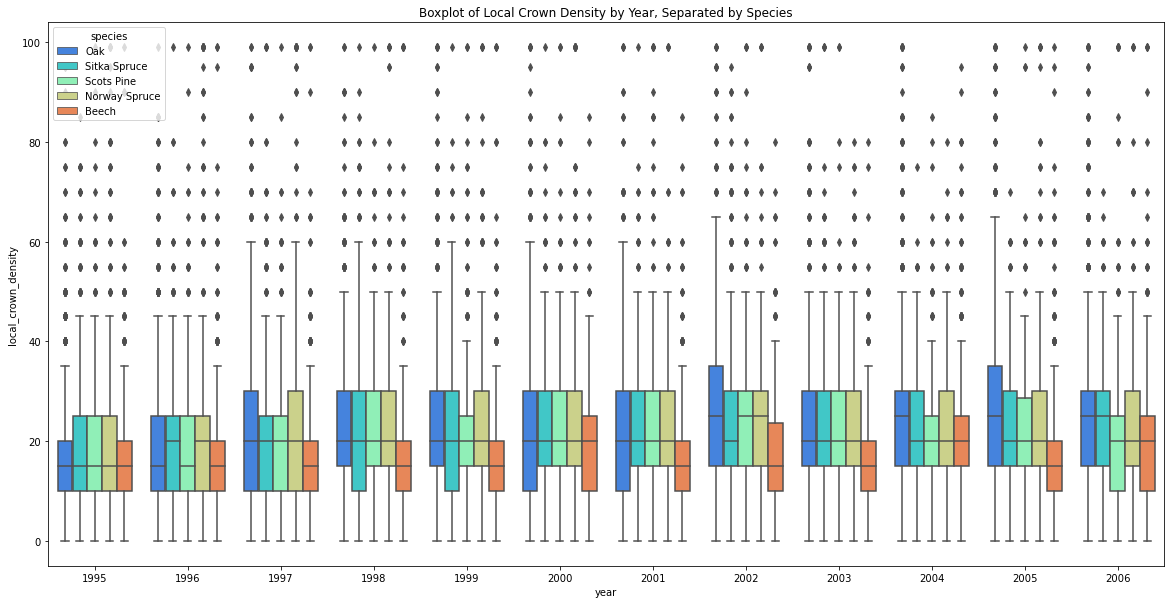

In [57]:
plt.figure(figsize=(20,10))
sns.boxplot(y='local_crown_density',x='year',data=df1, hue='species', palette='rainbow')
plt.title("Boxplot of Local Crown Density by Year, Separated by Species");

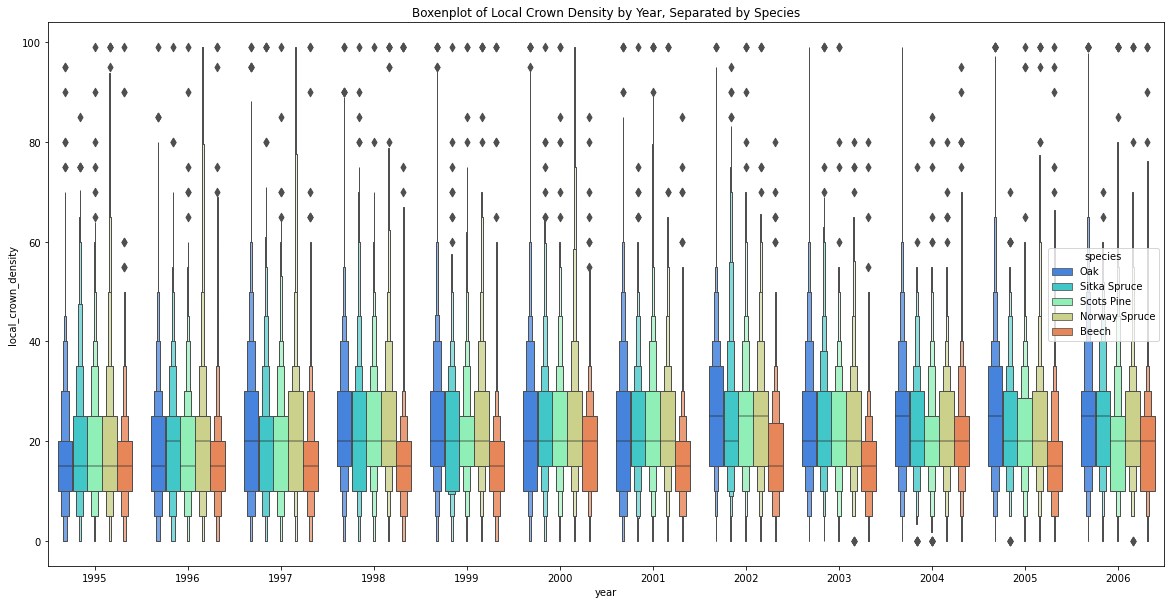

In [58]:
plt.figure(figsize=(20,10))
sns.boxenplot(y='local_crown_density',x='year',data=df1, hue='species', palette='rainbow')
plt.title("Boxenplot of Local Crown Density by Year, Separated by Species");
plt.savefig("lcdospecies.png", bbox_inches='tight')

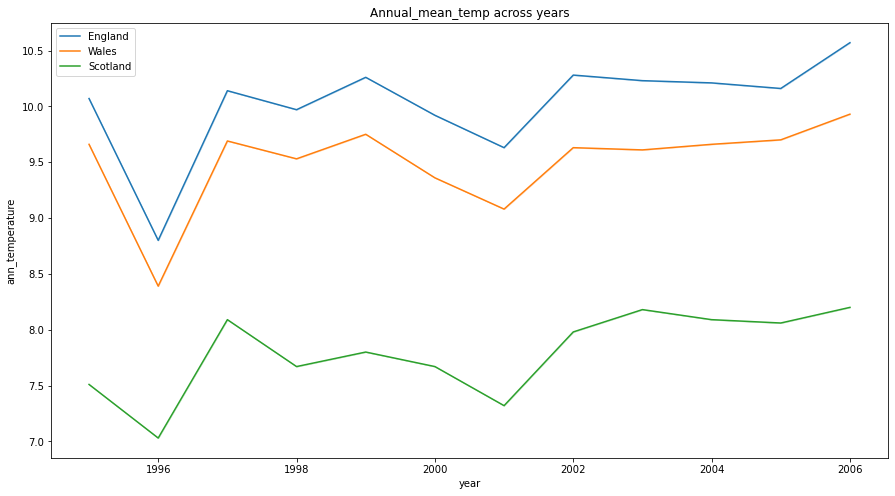

In [59]:
plt.figure(figsize=(15,8))
sns.lineplot(y='ann_temperature',x='year',data=df[df['country'] == 'England'], palette='rainbow', label='England')
sns.lineplot(y='ann_temperature',x='year',data=df[df['country'] == 'Wales'], palette='rainbow', label = 'Wales')
sns.lineplot(y='ann_temperature',x='year',data=df[df['country'] == 'Scotland'], palette='rainbow', label = 'Scotland')
plt.title("Annual_mean_temp across years");

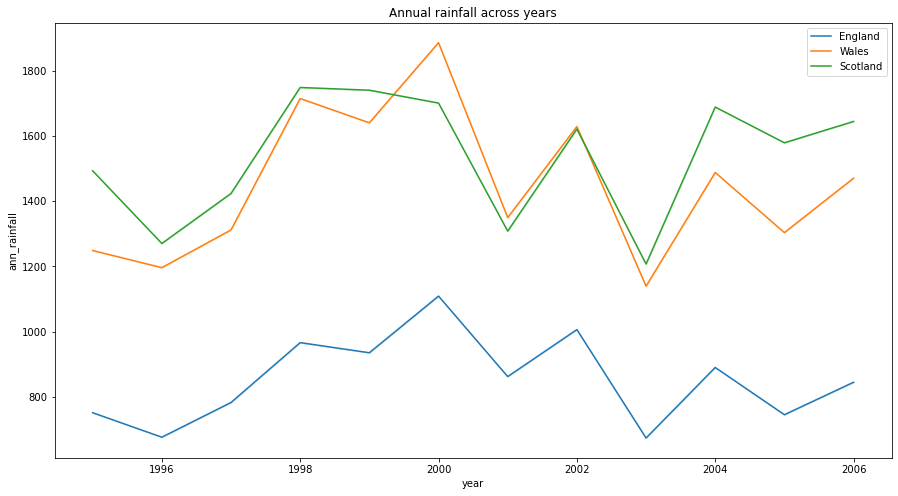

In [60]:
plt.figure(figsize=(15,8))
sns.lineplot(y='ann_rainfall',x='year',data=df[df['country'] == 'England'], palette='rainbow', label='England')
sns.lineplot(y='ann_rainfall',x='year',data=df[df['country'] == 'Wales'], palette='rainbow', label = 'Wales')
sns.lineplot(y='ann_rainfall',x='year',data=df[df['country'] == 'Scotland'], palette='rainbow', label = 'Scotland')
plt.title("Annual rainfall across years");

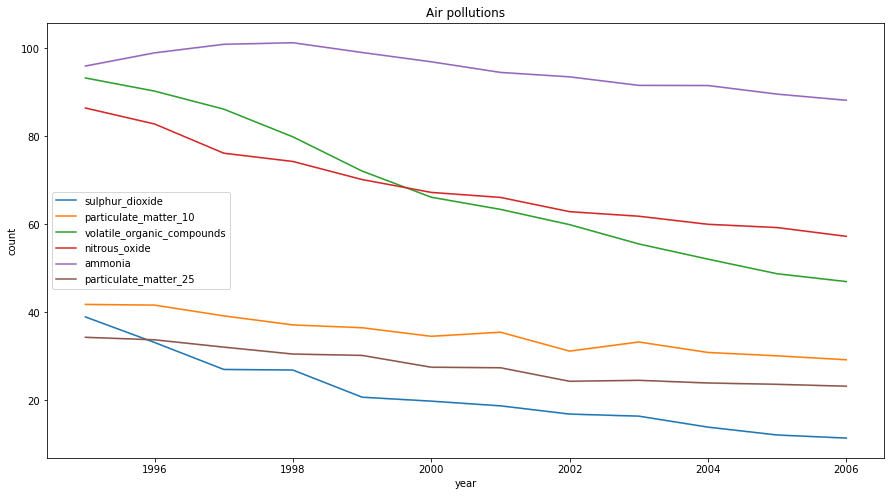

In [61]:
plt.figure(figsize=(15,8))
sns.lineplot(y='sulphur_dioxide',x='year',data=df1, palette='rainbow', label='sulphur_dioxide')
sns.lineplot(y='particulate_matter_10',x='year',data=df1, palette='rainbow', label = 'particulate_matter_10')
sns.lineplot(y='volatile_organic_compounds',x='year',data=df1, palette='rainbow', label = 'volatile_organic_compounds')
sns.lineplot(y='nitrous_oxide',x='year',data=df1, palette='rainbow', label = 'nitrous_oxide')
sns.lineplot(y='ammonia',x='year',data=df1, palette='rainbow', label = 'ammonia')
sns.lineplot(y='particulate_matter_25',x='year',data=df1, palette='rainbow', label = 'particulate_matter_25')
plt.xlabel("year")
plt.ylabel("count")
plt.title("Air pollutions");

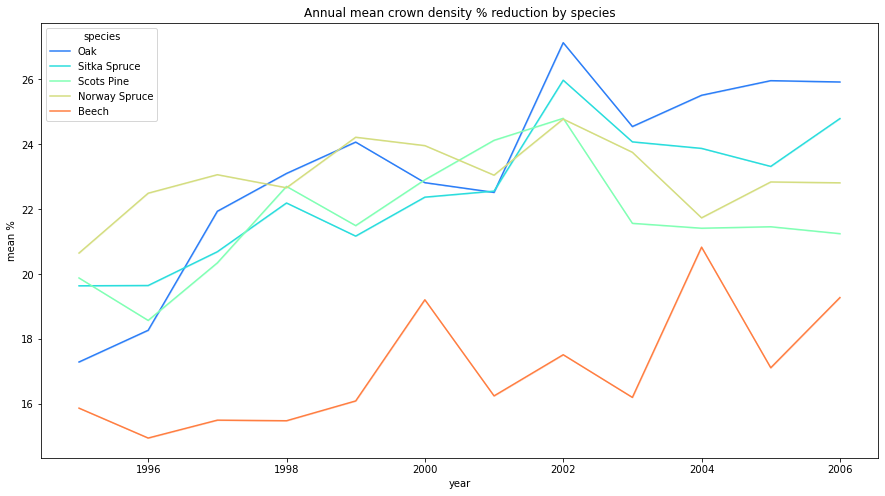

In [62]:

plt.figure(figsize=(15,8))
sns.lineplot(y='mean_col',x='year',data=df, hue= 'species', palette='rainbow')

plt.xlabel("year")
plt.ylabel("mean %")
plt.title("Annual mean crown density % reduction by species");

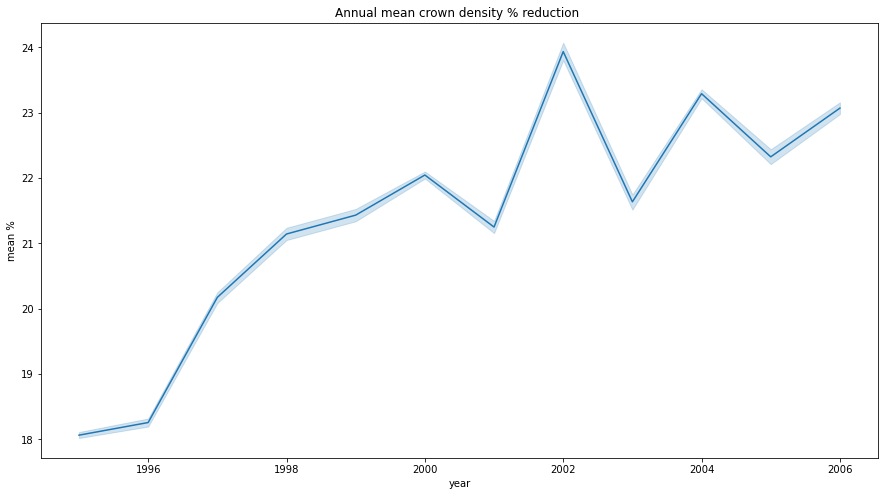

In [63]:
plt.figure(figsize=(15,8))
sns.lineplot(y='mean_col',x='year',data=df, palette='rainbow')
plt.xlabel("year")
plt.ylabel("mean %")
plt.title("Annual mean crown density % reduction ");

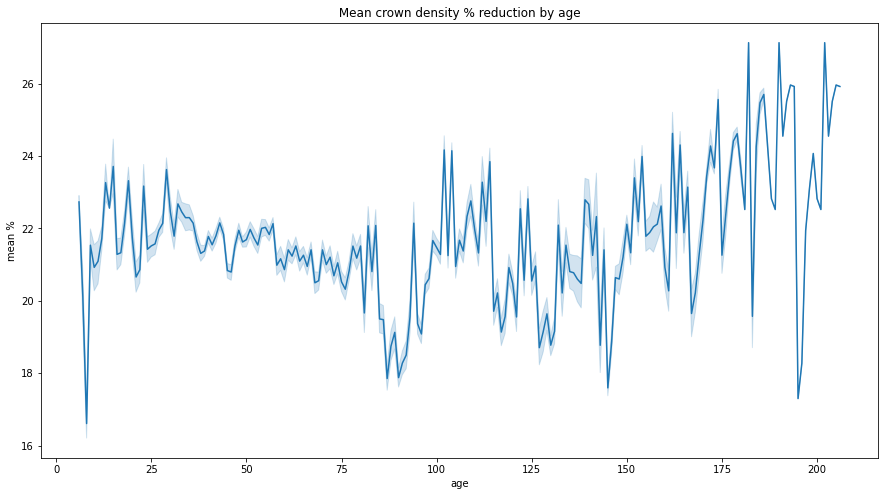

In [64]:
plt.figure(figsize=(15,8))
sns.lineplot(y='mean_col',x='age',data=df)
plt.xlabel("age")
plt.ylabel("mean %")
plt.title(" Mean crown density % reduction by age ");

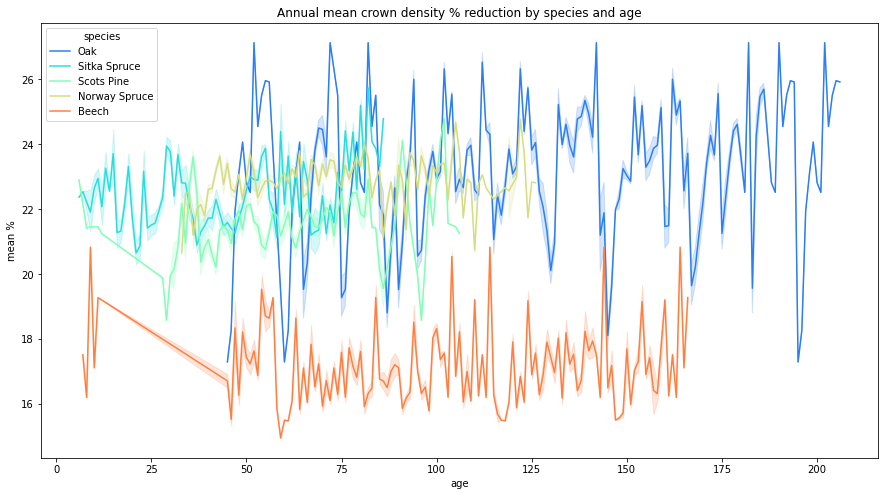

In [65]:
plt.figure(figsize=(15,8))
sns.lineplot(y='mean_col',x='age',data=df, hue= 'species', palette='rainbow')

plt.xlabel("age")
plt.ylabel("mean %")
plt.title("Annual mean crown density % reduction by species and age");

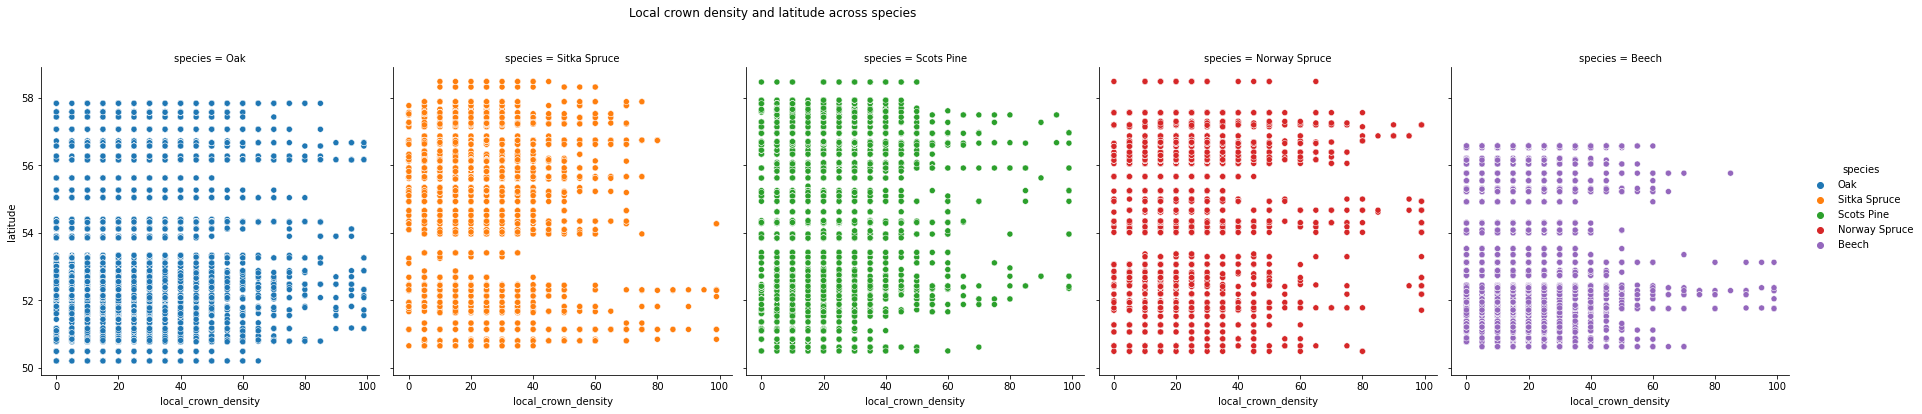

In [66]:
#plt.figure(figsize=(40,40))
sns.relplot(
    data=df, x="local_crown_density", y="latitude",
     hue = 'species', col= 'species',
    kind="scatter")

plt.suptitle('Local crown density and latitude across species', x=0.4, y=1.1);


In [67]:
df.to_csv('EDA_forest.csv', index=False)